In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

# One-hot encoding of words or characters

This notebook contains the first code sample found in Chapter 6, Section 1 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). Note that the original text features far more content, in particular further explanations and figures: in this notebook, you will only find source code and related comments.

----

One-hot encoding is the most common, most basic way to turn a token into a vector. You already saw it in action in our initial IMDB and 
Reuters examples from chapter 3 (done with words, in our case). It consists in associating a unique integer index to every word, then 
turning this integer index i into a binary vector of size N, the size of the vocabulary, that would be all-zeros except for the i-th 
entry, which would be 1.

Of course, one-hot encoding can be done at the character level as well. To unambiguously drive home what one-hot encoding is and how to 
implement it, here are two toy examples of one-hot encoding: one for words, the other for characters.



Word level one-hot encoding (toy example):

In [2]:
import numpy as np

# This is our initial data; one entry per "sample"
# (in this toy example, a "sample" is just a sentence, but
# it could be an entire document).
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# First, build an index of all tokens in the data.
token_index = {}
for sample in samples:
    # We simply tokenize the samples via the `split` method.
    # in real life, we would also strip punctuation and special characters
    # from the samples.
    for word in sample.split():
        if word not in token_index:
            # Assign a unique index to each unique word
            token_index[word] = len(token_index) + 1
            # Note that we don't attribute index 0 to anything.

# Next, we vectorize our samples.
# We will only consider the first `max_length` words in each sample.
max_length = 10

# This is where we store our results:
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

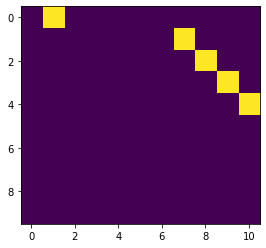

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(results[1,])

Character level one-hot encoding (toy example)

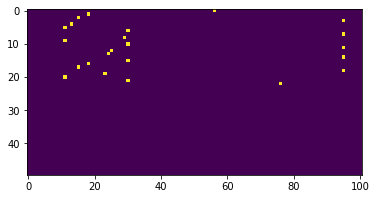

In [8]:
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable  # All printable ASCII characters.
token_index = dict(zip(characters, range(1, len(characters) + 1)))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample[:max_length]):
        index = token_index.get(character)
        results[i, j, index] = 1.
        
plt.imshow(results[0,])        

Note that Keras has built-in utilities for doing one-hot encoding text at the word level or character level, starting from raw text data. 
This is what you should actually be using, as it will take care of a number of important features, such as stripping special characters 
from strings, or only taking into the top N most common words in your dataset (a common restriction to avoid dealing with very large input 
vector spaces).

Using Keras for word-level one-hot encoding:

In [9]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# We create a tokenizer, configured to only take
# into account the top-1000 most common words
tokenizer = Tokenizer(num_words=1000)
# This builds the word index
tokenizer.fit_on_texts(samples)

# This turns strings into lists of integer indices.
sequences = tokenizer.texts_to_sequences(samples)

# You could also directly get the one-hot binary representations.
# Note that other vectorization modes than one-hot encoding are supported!
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

# This is how you can recover the word index that was computed
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.



A variant of one-hot encoding is the so-called "one-hot hashing trick", which can be used when the number of unique tokens in your 
vocabulary is too large to handle explicitly. Instead of explicitly assigning an index to each word and keeping a reference of these 
indices in a dictionary, one may hash words into vectors of fixed size. This is typically done with a very lightweight hashing function. 
The main advantage of this method is that it does away with maintaining an explicit word index, which 
saves memory and allows online encoding of the data (starting to generate token vectors right away, before having seen all of the available 
data). The one drawback of this method is that it is susceptible to "hash collisions": two different words may end up with the same hash, 
and subsequently any machine learning model looking at these hashes won't be able to tell the difference between these words. The likelihood 
of hash collisions decreases when the dimensionality of the hashing space is much larger than the total number of unique tokens being hashed.

Word-level one-hot encoding with hashing trick (toy example):

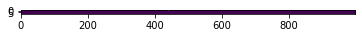

In [10]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# We will store our words as vectors of size 1000.
# Note that if you have close to 1000 words (or more)
# you will start seeing many hash collisions, which
# will decrease the accuracy of this encoding method.
dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        # Hash the word into a "random" integer index
        # that is between 0 and 1000
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.
        
plt.imshow(results[0,])        